# Post 3 K-means Clustering

In this post I will be using K-means clustering to create customer clusters from the RFM table. This will allow me to categorize
the customers on a more granular level than the rudimentary quantile analysis did in post 2

loading in the required packages packages

In [2]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
import sklearn.datasets as ds
from sklearn.decomposition import PCA

importing the data
Now I will import the RFM table from the previous analysis

In [32]:
df = pd.read_csv("Post3_data")

df.head()

#I need to remove the CustomerID table from the RFM table so that it does not sort on that
df.loc[:, ['Recency','Frequency','Monetary_Value']]

df.head()

,CustomerID,Recency,Frequency,Monetary_Value
0,12346.0,325,1,77183.60
1,12747.0,2,103,4196.01
2,12748.0,0,4596,33719.73
3,12749.0,3,199,4090.88
4,12820.0,3,59,942.34


Note on additional data cleaning

Because Kmeans clustering uses Euclidian distance, it is not a good idea to have categorical variables
The standard k-means algorithm isn't directly applicable to categorical data, for various reasons. 
The sample space for categorical data is discrete, and doesn't have a natural origin. A Euclidean distance function on 
such a space isn't really meaningful. As someone put it, "The fact a snake possesses neither wheels nor legs allows 
us to say nothing about the relative value of wheels and legs."

Fortunately, there are no categorical variables in this dataset, but if I ever add them in I will need to find a work-around
for this.

Standardizing the data

Standardization is very important, especially with K-means clustering. ven though I've already cleaned the data, it's a good practice to make sure that any NA values that I may have missed
are set to 0, that's what the following code does

In [4]:
df=df.fillna(value=0,axis=1)

x is an object with the values of the data frame - think of it as an object with a vecor of values where the values are equal
to the cells of the data frame

In [5]:
X = df.values

The code below actually standardizes the values of the data frame

In [6]:
X_std = StandardScaler().fit_transform(X)

Principle Component Analysis (PCA)

Now that the data is standardized, the next step is to reduce the dimensionality of the data. 

The algorithm of Kmeans clustering takes place in a two dimensional space. However, most datasets we work with are not two
dimensional. Long story short, dimensionality reduction techniques are needed to accomodate this - 
I've decided to go with Principle Component Analysis (PCA) for the dimensionality reduction

The code below actually preforms the PCA - pca is an object with the number of principle components

In [7]:
pca=PCA(n_components=2)

the following code basically appplies the transformation (dimensionality reduction) specified in the previous line of code to the
standardized values of the df

In [8]:
x_3d = pca.fit_transform(X_std)

now that we have reduced the dimensionality of the dataset to two principle components, we can apply the kmeans clustering
alogorithm

Before we actually apply the algorithm, I'm going to create a covariance matrix to see which features are the are correlated with each other.

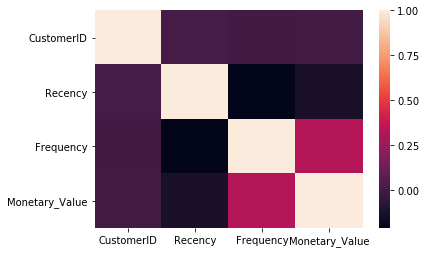

In [9]:
# calculate the correlation matrix
corr = df.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

From this covariance matrix we can see several things. 
Firstly, Frequency and Monetary Value have a fairly strong positive correlation (between 0.25 and 0.5)
Secondly, Frequency and Recency have the strongest negative correlation.
Thirdly, Recency and Monetary Value have a correlation closest to 0

K-Means Clustering

In [10]:
#This code applies the clustering algorithm to the standardized, dimensionally reduced data
#I'm going to arbitrarily set the number of clusters to 4. If you don't understand why I have to do this, go read a book
kmeans = KMeans(n_clusters = 4)
kmeans.fit(x_3d)
k = 4
y_kmeans = kmeans.predict(x_3d)

In [11]:
#Applying the labesl attribute of KMeans to get an array of the cluster assignment for each training vector
labels = kmeans.labels_
centroids = kmeans.predict(x_3d)

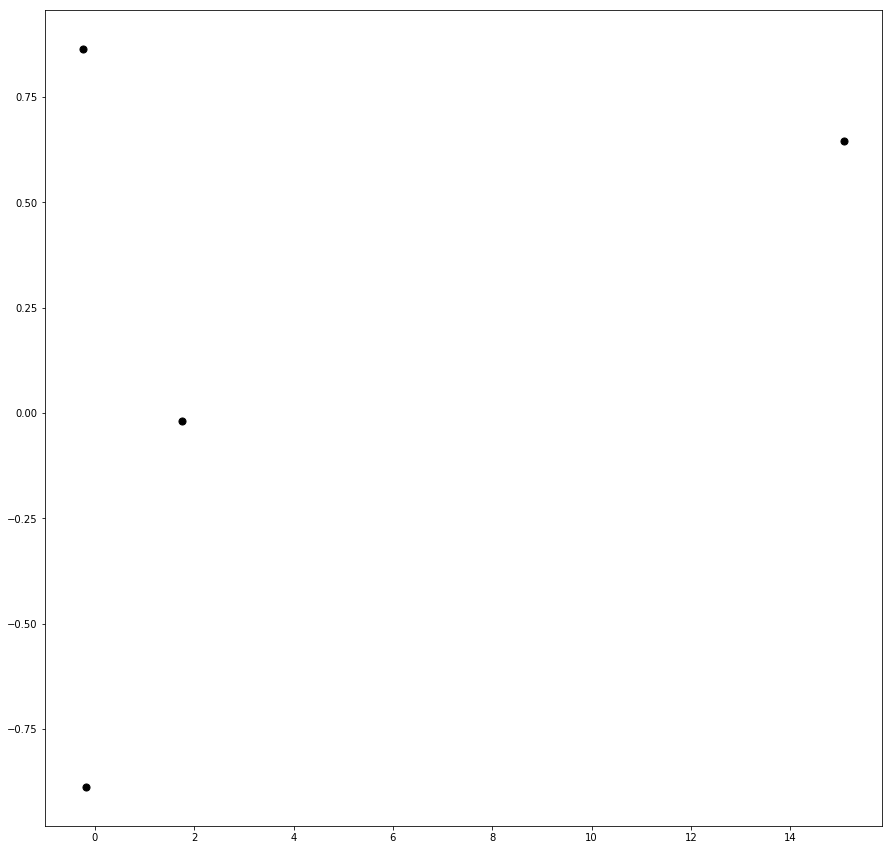

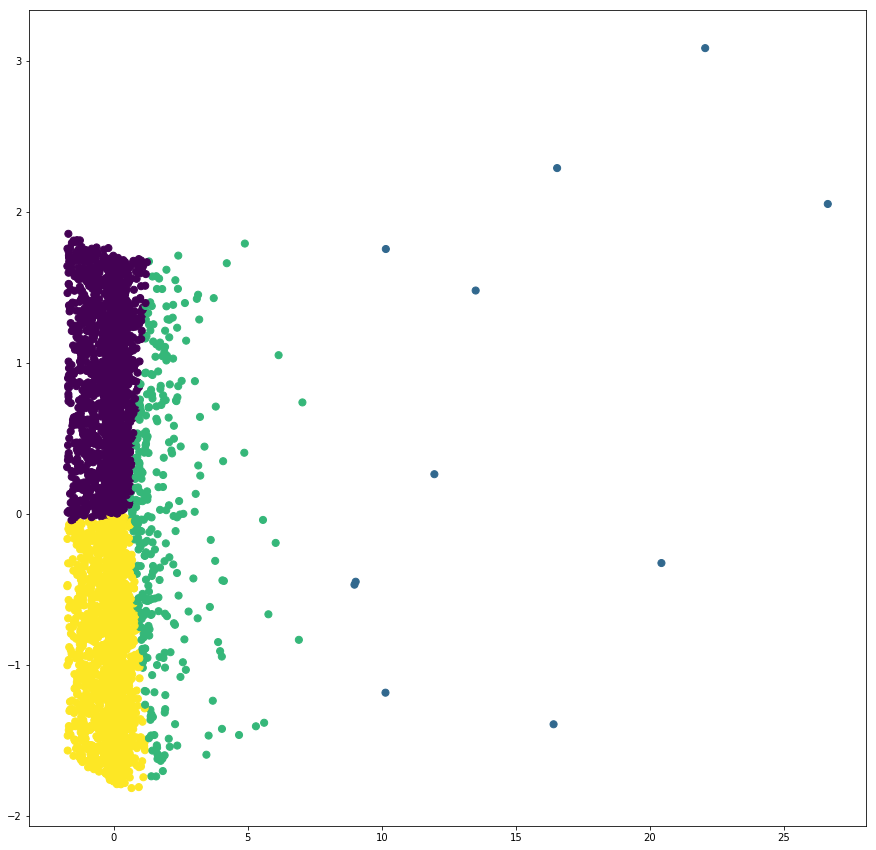

In [12]:
#This first plot will be a plot of the centroids a.k.a. the centers of the cluster
plt.figure(figsize=(15,15))
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c = 'black', s=50, cmap='viridis');

#This second plot will be a plot of the clusters
plt.figure(figsize = (15,15))
plt.scatter(x_3d[:,0], x_3d[:,1], c=y_kmeans, s=50,cmap='viridis')

Finding the ideal value of K

In [13]:
#The easiest way to do that is to calculate the silhoutte coefficients
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.9615916760255001
For n_clusters=3, The Silhouette Coefficient is 0.9319629345919964
For n_clusters=4, The Silhouette Coefficient is 0.713024651472435
For n_clusters=5, The Silhouette Coefficient is 0.44924947800942006
For n_clusters=6, The Silhouette Coefficient is 0.46693085932635126
For n_clusters=7, The Silhouette Coefficient is 0.4637300361609293
For n_clusters=8, The Silhouette Coefficient is 0.4840639388541874
For n_clusters=9, The Silhouette Coefficient is 0.39979425024237847
For n_clusters=10, The Silhouette Coefficient is 0.3997801703201195


Because the silhoutte Coefficient for two clusters is the highest, the ideal number of clusters is 2. Because of this I can
rerun the clustering with K=2

In [15]:
#Now to rerun the clustering with the ideal value of K (K=2)
kmeans = KMeans(n_clusters = 2)
kmeans.fit(x_3d)
k = 2
y_kmeans = kmeans.predict(x_3d)

In [16]:
#Re-applying the labesl attribute of KMeans to get an array of the cluster assignment for each training vector
labels = kmeans.labels_
centroids = kmeans.predict(x_3d)

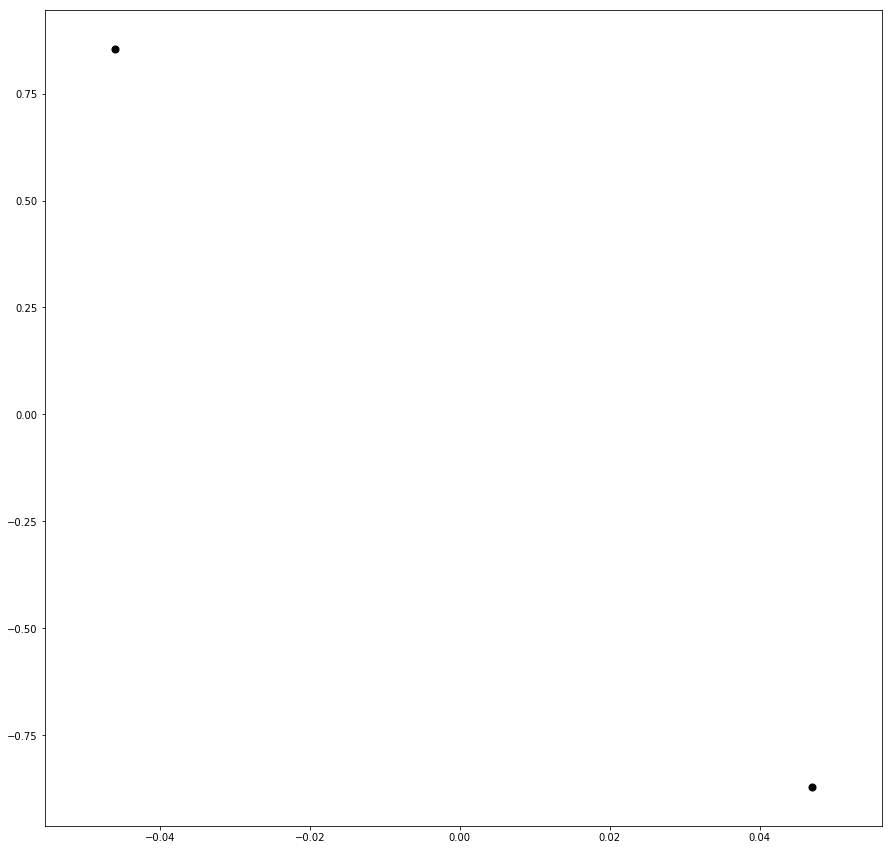

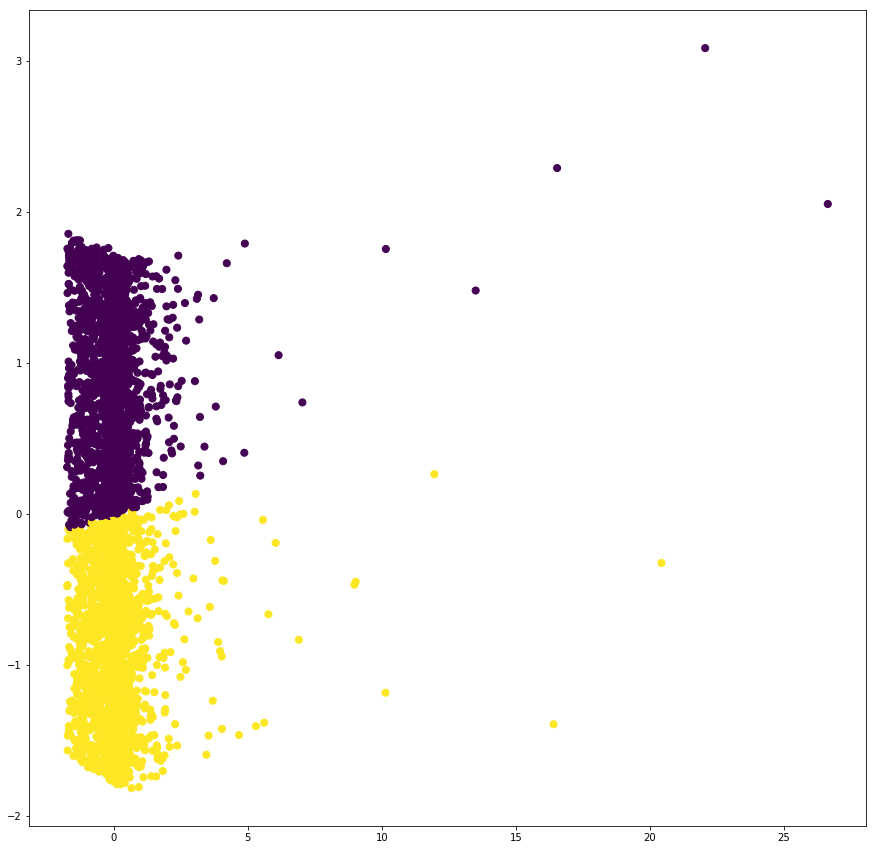

In [17]:
#Re-plotting
plt.figure(figsize=(15,15))
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c = 'black', s=50, cmap='viridis');

#This second plot will be a plot of the clusters
plt.figure(figsize = (15,15))
plt.scatter(x_3d[:,0], x_3d[:,1], c=y_kmeans, s=50,cmap='viridis')

In [18]:
#This code pulls out the labes or cluster
result = zip(x_3d, labels, df.CustomerID)

sortedR = sorted(result, key=lambda x: x[1])
sortedR

[(array([-1.61886845, -0.08901576]), 0, 15204.0),
 (array([-1.66648354, -0.07286354]), 0, 15221.0),
 (array([-1.60837029, -0.07548503]), 0, 15224.0),
 (array([-1.46638632, -0.07239225]), 0, 15262.0),
 (array([-1.55402266, -0.06191197]), 0, 15266.0),
 (array([-1.5773586 , -0.04287125]), 0, 15279.0),
 (array([-1.21639913, -0.06172081]), 0, 15303.0),
 (array([-1.19756084, -0.06985995]), 0, 15308.0),
 (array([-1.50873551, -0.03711061]), 0, 15316.0),
 (array([-1.25758485, -0.05857593]), 0, 15319.0),
 (array([-1.44680708, -0.02438901]), 0, 15326.0),
 (array([-1.48263492, -0.01332081]), 0, 15346.0),
 (array([-1.68321781,  0.00566244]), 0, 15347.0),
 (array([-1.72321394,  0.01103376]), 0, 15350.0),
 (array([-0.934894  , -0.04757277]), 0, 15353.0),
 (array([-1.63629656,  0.01306235]), 0, 15361.0),
 (array([-1.66897415,  0.02053403]), 0, 15363.0),
 (array([-0.9192518 , -0.05727202]), 0, 15381.0),
 (array([-1.49112797,  0.0122934 ]), 0, 15395.0),
 (array([-1.32493778, -0.00702878]), 0, 15397.0),


Exporting the labeled data to a csv

In [19]:
#Exporting the labeled dataset as a csv

df_1 = pd.DataFrame(sortedR)
df_1.columns = [
    'x-y coordinates',
    'Cluster',
    'CustomerID'
]

df_1.head()

,x-y coordinates,Cluster,CustomerID
0,"[-1.6188684520532173, -0.08901575522135192]",0,15204.0
1,"[-1.6664835394635387, -0.07286353975299929]",0,15221.0
2,"[-1.608370294817107, -0.07548502798554972]",0,15224.0
3,"[-1.4663863216200863, -0.0723922459693008]",0,15262.0
4,"[-1.5540226574389002, -0.061911967943245376]",0,15266.0


This code writes the exported table to a csv

In [22]:
df_1.to_csv('Clustered_Customers')

This code will read in the RFM table to join with the labeled Customer IDs

In [26]:
df_2 = pd.read_csv('Segmented_RFM')

In [27]:
df_full = df_1.join(df_2.set_index('CustomerID'), on = 'CustomerID')

df_full.head()

,x-y coordinates,Cluster,CustomerID,Recency,Frequency,Monetary_Value,r_quartile,f_quartile,m_quartile,RFM_AggScore
0,"[-1.6188684520532173, -0.08901575522135192]",0,15204.0,357,9,316.58,4,4,3,443
1,"[-1.6664835394635387, -0.07286353975299929]",0,15221.0,366,5,403.25,4,4,3,443
2,"[-1.608370294817107, -0.07548502798554972]",0,15224.0,358,14,322.08,4,4,3,443
3,"[-1.4663863216200863, -0.0723922459693008]",0,15262.0,323,10,178.95,4,4,4,444
4,"[-1.5540226574389002, -0.061911967943245376]",0,15266.0,338,6,119.30,4,4,4,444


Now to see sort the fully joined table by RFM_AggScore to see if there is any relationship between "Top Customers" and the clusters

In [31]:
df_full.sort_values('RFM_AggScore')

,x-y coordinates,Cluster,CustomerID,Recency,Frequency,Monetary_Value,r_quartile,f_quartile,m_quartile,RFM_AggScore
1114,"[1.1970078972605995, 0.9349275602635099]",0,17068.0,12,296,4552.14,1,1,1,111
634,"[0.637015997523476, 0.49567124150327646]",0,16407.0,12,172,2126.93,1,1,1,111
2212,"[2.3674230873360176, -1.5355015121321918]",1,13137.0,10,704,3650.41,1,1,1,111
1717,"[2.393536760792963, 1.4895925401924217]",0,17920.0,4,696,4204.10,1,1,1,111
2214,"[0.8627749128797289, -1.552282277665493]",1,13139.0,16,170,5064.94,1,1,1,111
3138,"[3.1294919634883662, -0.6925782375136798]",1,14456.0,5,970,3062.40,1,1,1,111
644,"[3.8047303685760565, 0.7096642343000582]",0,16422.0,17,369,34684.40,1,1,1,111
648,"[1.2620185026464092, 0.5118668738708406]",0,16426.0,2,372,1908.25,1,1,1,111
3614,"[0.4761132665461928, -0.3226741311485013]",1,15123.0,7,106,2199.31,1,1,1,111
1679,"[0.9772235278765573, 1.4200742976204093]",0,17870.0,2,279,1894.35,1,1,1,111


The Kmeans clustering was very intersting. If I had more time, I would dig into the clusters and see how it would compare to the rudimentary analysis. Future work includes building a KNN model that predicts how valuable a new customer will be. However, these examples illustrates how to answer a broad question like "who are our most valueable customers" in a way that is easy to explain to non-technical management.